In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
# Downloading Dataset into Colab Enviroment
!curl "https://raw.githubusercontent.com/RebuniTech/Sms_SPam-detection/main/sms_dataset.tsv" --output sms_dataset.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  501k  100  501k    0     0   434k      0  0:00:01  0:00:01 --:--:--  439k


In [3]:
df = pd.read_csv('sms_dataset.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [4]:
print("Total Dataset:", len(df))

Total Dataset: 5572


In [5]:
#Check if we have any missing values
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

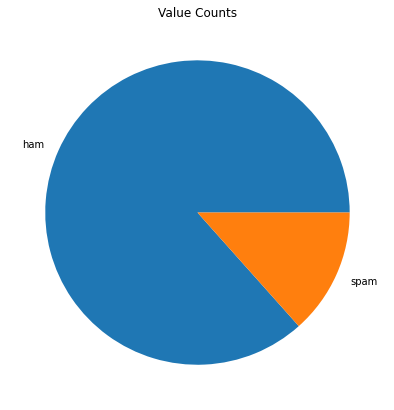

In [6]:
#plt.figure(, dpi=75)
df.label.value_counts().plot(kind='pie', figsize=(10, 7))
plt.title('Value Counts')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [7]:
#Split the data into X and Y feature i.e the independent and dependent feature
X = df.message # X_feature
y = df.label # y_label

#Splitting the data into test and train for the further training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Scikit-learn's CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. 
It also enables the pre-processing of text data prior to generating the vector representation. 
This functionality makes it a highly flexible feature representation module for text.

In [8]:
#Initializing the count vectorizer
count_vectorizer = CountVectorizer()

TF-IDF (Term Frequency - Inverse Document Frequency) is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document. It's a relatively simple but intuitive approach to weighting words, allowing it to act as a great jumping off point for a variety of tasks.

In [9]:
#Initializing the tfidf vectorizer
tfidf_transformer = TfidfTransformer()

In [10]:
# Now we will fit the data
count_vectorizer.fit(X_train)
X_train_cv = count_vectorizer.transform(X_train)
tfidf_transformer.fit(X_train_cv)
X_train_tfidf = tfidf_transformer.transform(X_train_cv)

In [11]:
# Let's now transform the data
X_test_cv = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_cv)

Now our data is ready for training, we will use classification algorithms to classify the message into spam.

#### 1: Using Naive Bayes

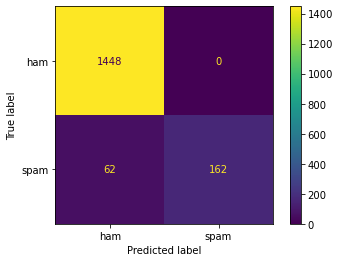

In [12]:
#Initializing the Naive Baye's classifier
naiv_bayes = MultinomialNB()

#Fit the data into the classifier
naiv_bayes.fit(X_train_tfidf, y_train)

#Predict the accuracy of the model and display through a confusion matrix
prediction_nb = naiv_bayes.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(naiv_bayes, X_test_tfidf, y_test)
plt.show()

In [14]:
score_nb = round(accuracy_score(prediction_nb,y_test)*100,2)
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.72      0.84       224

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672



#### 2 : Using Decision Tree

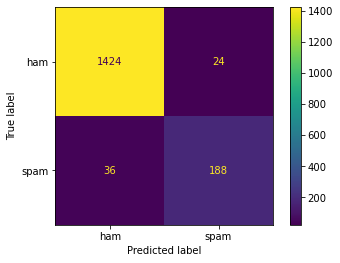

In [15]:
#Initializing the Decision Tree classifier
dt_cls = DecisionTreeClassifier()

#Fit the data into the classifier
dt_cls.fit(X_train_tfidf, y_train)

#Predict the accuracy of the model and display through a confusion matrix
prediction_dt = dt_cls.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(dt_cls, X_test_tfidf, y_test)
plt.show()

In [16]:
score_dt = round(accuracy_score(prediction_dt,y_test)*100,2)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98      1448
        spam       0.89      0.84      0.86       224

    accuracy                           0.96      1672
   macro avg       0.93      0.91      0.92      1672
weighted avg       0.96      0.96      0.96      1672



#### 3: Using Linear SVC

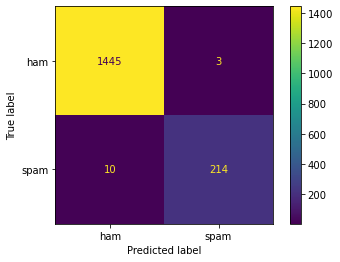

In [17]:
#Initializing the Support vector classifier
lsvc = LinearSVC()

#Fit the data into the classifier
svc = lsvc.fit(X_train_tfidf, y_train)

#Predict the accuracy of the model and display through a confusion matrix
prediction_svc = lsvc.predict(X_test_tfidf)
ConfusionMatrixDisplay.from_estimator(lsvc, X_test_tfidf, y_test)
plt.show()

In [18]:
score_svc = round(accuracy_score(prediction_svc,y_test)*100,2)
print(classification_report(y_test, prediction_svc))

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1448
        spam       0.99      0.96      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.98      0.98      1672
weighted avg       0.99      0.99      0.99      1672



## Conclusion

In [19]:
scores = [score_nb,score_svc,score_dt]
algorithms = ["Naive Bayes","Support Vector Classifier","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Naive Bayes is: 96.29 %
The accuracy score achieved using Support Vector Classifier is: 99.22 %
The accuracy score achieved using Decision Tree is: 96.41 %


C:\Users\SANAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

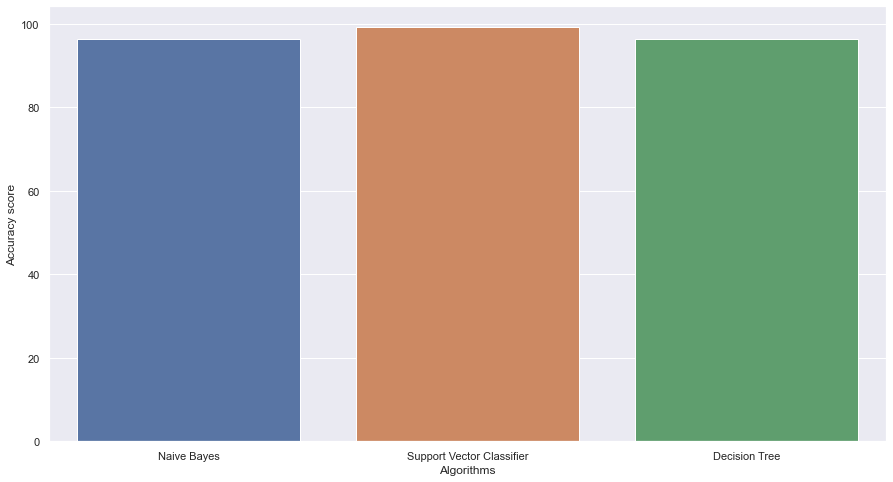

In [20]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hence, we can see that Support vector Classifier is performing the best hence, we will use this for our deployment.